# Bibliotecas

In [1059]:
import os 
import json
from kaggle.api.kaggle_api_extended import KaggleApi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baixando o dataset via API

In [1060]:
# Caminho para arquivo kaggle.json
with open ('../secrets/kaggle.json') as f:
    kaggle_token = json.load(f)

In [1061]:
# Configuração das credenciais temporárias
os.environ['KAGGLE_USERNAME'] = kaggle_token['username']
os.environ['KAGGLE_KEY'] = kaggle_token['key']

In [1062]:
# Inicializa e autentica
api = KaggleApi()
api.authenticate()

In [1063]:
# Baixar e descompactar
dataset = 'kyanyoga/sample-sales-data'
api.dataset_download_files(dataset, path="../data",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data


# Leitura e Exploração Inicial da Base

In [1064]:
df_inicial = pd.read_csv('../data/sales_data_sample.csv', encoding='latin1')

In [1065]:
df_inicial.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [1066]:
df_inicial.shape

(2823, 25)

In [1067]:
df_inicial.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [1068]:
df_inicial.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [1069]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [1070]:
df_inicial.isnull()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [1071]:
print(df_inicial['QUANTITYORDERED'].describe())


count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64


## Tratando o dataset

In [1072]:
#dicionário das colunas do dataset sales_data_sample

df_columns = {
    'ORDERNUMBER':'numero_pedido',
    'QUANTITYORDERED':'quantidade_solicitada',
    'PRICEEACH':'preco_unitario',
    'ORDERLINENUMBER': 'numero_linha_pedido',
    'SALES':'valor_total',
    'ORDERDATE':'data_pedido',
    'STATUS':'status_pedido',
    'QTR_ID':'id_trimestre',
    'MONTH_ID':'id_mes',
    'YEAR_ID':'id_ano',
    'PRODUCTLINE':'linha_produto',
    'MSRP':'preco_sugerido',
    'PRODUCTCODE':'codigo_produto',
    'CUSTOMERNAME':'nome_cliente',
    'PHONE':'telefone_cliente',
    'ADDRESSLINE1':'endereco_principal',
    'ADDRESSLINE2':'complemento',
    'CITY':'cidade_cliente',
    'STATE':'estado_cliente',
    'POSTALCODE':'cep_cliente',
    'COUNTRY':'pais_cliente',
    'TERRITORY':'territorio_comercial',
    'CONTACTLASTNAME':'sobrenome_contato',
    'CONTACTFIRSTNAME':'nome_contato',
    'DEALSIZE':'porte_negocio'
}

In [1073]:
df_col_renomeadas = df_inicial.rename(columns=df_columns)


In [1074]:
df_col_renomeadas

,numero_pedido,quantidade_solicitada,preco_unitario,numero_linha_pedido,valor_total,data_pedido,status_pedido,id_trimestre,id_mes,id_ano,...,endereco_principal,complemento,cidade_cliente,estado_cliente,cep_cliente,pais_cliente,territorio_comercial,sobrenome_contato,nome_contato,porte_negocio
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# Análise do meu dataset

In [1075]:
df_clientes_pedidos_unicos  = df_col_renomeadas.groupby('nome_cliente')['numero_pedido'].nunique().reset_index()

In [1076]:
df_clientes_pedidos_unicos.columns = ['nome_cliente', 'quantidade_pedidos_unicos']

In [1077]:
df_clientes_pedidos_unicos.describe()

,quantidade_pedidos_unicos
count,92.000000
mean,3.336957
std,2.924986
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,26.000000


In [1078]:
#faixas cliente
limite_prata = 3
limite_ouro = 5

In [1079]:
def classificar_cliente(numero_pedidos):
    if numero_pedidos >= limite_ouro:
        return "Ouro"
    elif numero_pedidos >= limite_prata:
        return "Prata"
    else:
        return "Bronze"

In [1080]:
df_clientes_pedidos_unicos['faixa_cliente'] = df_clientes_pedidos_unicos['quantidade_pedidos_unicos'].apply(classificar_cliente)

In [1081]:
df_clientes_pedidos_unicos

,nome_cliente,quantidade_pedidos_unicos,faixa_cliente
0,"AV Stores, Co.",3,Prata
1,Alpha Cognac,3,Prata
2,Amica Models & Co.,2,Bronze
3,"Anna's Decorations, Ltd",4,Prata
4,Atelier graphique,3,Prata
...,...,...,...
87,"Vida Sport, Ltd",2,Bronze
88,Vitachrome Inc.,3,Prata
89,"Volvo Model Replicas, Co",4,Prata
90,West Coast Collectables Co.,2,Bronze


In [1082]:
print("\nDataFrame com a coluna 'faixa_cliente':\n", df_clientes_pedidos_unicos.sort_values(by='quantidade_pedidos_unicos', ascending=False).head(15))


DataFrame com a coluna 'faixa_cliente':
                     nome_cliente  quantidade_pedidos_unicos faixa_cliente
33         Euro Shopping Channel                         26          Ouro
55  Mini Gifts Distributors Ltd.                         17          Ouro
6     Australian Collectors, Co.                          5          Ouro
27      Danish Wholesale Imports                          5          Ouro
66            Reims Collectables                          5          Ouro
31       Dragon Souveniers, Ltd.                          5          Ouro
58            Muscle Machine Inc                          4         Prata
45             Land of Toys Inc.                          4         Prata
13          Blauer See Auto, Co.                          4         Prata
23      Corporate Gift Ideas Co.                          4         Prata
11            Baane Mini Imports                          4         Prata
3        Anna's Decorations, Ltd                          4         Pr

In [1083]:
df_faixa_cliente = df_clientes_pedidos_unicos['faixa_cliente'].value_counts()

In [1084]:
df_faixa_cliente

faixa_cliente
Prata     57
Bronze    29
Ouro       6
Name: count, dtype: int64

In [1085]:
#Verificando se um cliente tem mais de um contato
cliente_buscado = 'Dragon Souveniers, Ltd.'

df_cliente_especifico = df_col_renomeadas[df_col_renomeadas['nome_cliente'] == cliente_buscado]

if df_cliente_especifico.empty:
    print(f"O cliente '{cliente_buscado}' não foi encontrado na base de clientes.")
else:
    print(f"\nDados do cliente '{cliente_buscado}':")
    print(df_cliente_especifico[['nome_cliente', 'nome_contato', 'sobrenome_contato']])


Dados do cliente 'Dragon Souveniers, Ltd.':
                 nome_cliente nome_contato sobrenome_contato
30    Dragon Souveniers, Ltd.         Eric         Natividad
137   Dragon Souveniers, Ltd.         Eric         Natividad
187   Dragon Souveniers, Ltd.         Eric         Natividad
191   Dragon Souveniers, Ltd.         Eric         Natividad
216   Dragon Souveniers, Ltd.         Eric         Natividad
267   Dragon Souveniers, Ltd.         Eric         Natividad
271   Dragon Souveniers, Ltd.         Eric         Natividad
317   Dragon Souveniers, Ltd.         Eric         Natividad
321   Dragon Souveniers, Ltd.         Eric         Natividad
372   Dragon Souveniers, Ltd.         Eric         Natividad
408   Dragon Souveniers, Ltd.         Eric         Natividad
424   Dragon Souveniers, Ltd.         Eric         Natividad
658   Dragon Souveniers, Ltd.         Eric         Natividad
707   Dragon Souveniers, Ltd.         Eric         Natividad
758   Dragon Souveniers, Ltd.         Er

# Criando as tabelas Clientes e Vendas

In [1086]:
colunas = [
    ('nome_cliente', 'clientes'),
    ('telefone_cliente', 'clientes'),
    ('endereco_principal','clientes'),
    ('complemento', 'clientes'),
    ('cidade_cliente', 'clientes'),
    ('estado_cliente','clientes'),
    ('cep_cliente', 'clientes'),
    ('pais_cliente', 'clientes'),
    ('territorio_comercial', 'clientes'),
    ('sobrenome_contato', 'clientes'),
    ('nome_contato', 'clientes'),
    ('numero_pedido', 'vendas'),
    ('numero_linha_pedido', 'vendas'),
    ('data_pedido', 'vendas'),
    ('status_pedido', 'vendas'),
    ('id_trimestre', 'vendas'),
    ('id_mes', 'vendas'),
    ('id_ano', 'vendas'),
    ('linha_produto', 'vendas'),
    ('codigo_produto', 'vendas'),
    ('preco_sugerido','vendas'),
    ('quantidade_solicitada', 'vendas'),
    ('preco_unitario', 'vendas'),
    ('valor_total', 'vendas'),
    ('porte_negocio', 'vendas'),
    ('nome_cliente', 'vendas')
]

In [1087]:
tl_clientes = []
tl_vendas = []

for nome_coluna, tabela in colunas:
    if tabela == 'clientes':
        tl_clientes.append(nome_coluna)
    else:
        tl_vendas.append(nome_coluna)

In [1088]:
# Listas finais

print('Colunas da tabela Cliente:')
print(tl_clientes)

print('\nColunas da tabela Vendas:')
print(tl_vendas)

Colunas da tabela Cliente:
['nome_cliente', 'telefone_cliente', 'endereco_principal', 'complemento', 'cidade_cliente', 'estado_cliente', 'cep_cliente', 'pais_cliente', 'territorio_comercial', 'sobrenome_contato', 'nome_contato']

Colunas da tabela Vendas:
['numero_pedido', 'numero_linha_pedido', 'data_pedido', 'status_pedido', 'id_trimestre', 'id_mes', 'id_ano', 'linha_produto', 'codigo_produto', 'preco_sugerido', 'quantidade_solicitada', 'preco_unitario', 'valor_total', 'porte_negocio', 'nome_cliente']


In [1089]:
df_clientes = df_col_renomeadas[tl_clientes]
df_vendas = df_col_renomeadas[tl_vendas]


# Tabela Cliente

In [1090]:
df_clientes_unicos = df_clientes.drop_duplicates()

In [1091]:
df_sem_duplicadas = df_clientes.drop_duplicates()
linhas_antes = df_clientes.shape[0]
linhas_depois = df_clientes.shape[0]

print(f"Linhas removidas: {linhas_antes - linhas_depois}")


Linhas removidas: 0


## Enriquecedor tabelas Clientes

In [1092]:
df_clientes_unicos = pd.merge(
    df_clientes_unicos,
    df_clientes_pedidos_unicos,
    on='nome_cliente',
    how='left'
)

In [1093]:
df_clientes_ordenada = df_clientes_unicos.sort_values(
    by=['nome_cliente', 'quantidade_pedidos_unicos'], ascending=[True,False]
)

In [1094]:
df_cliente_f = df_clientes_ordenada.reset_index(drop=True)

In [1095]:
df_cliente_f

,nome_cliente,telefone_cliente,endereco_principal,complemento,cidade_cliente,estado_cliente,cep_cliente,pais_cliente,territorio_comercial,sobrenome_contato,nome_contato,quantidade_pedidos_unicos,faixa_cliente
0,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,3,Prata
1,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,3,Prata
2,Amica Models & Co.,011-4988555,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo,2,Bronze
3,"Anna's Decorations, Ltd",02 9936 8555,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,4,Prata
4,Atelier graphique,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,EMEA,Schmitt,Carine,3,Prata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,"Vida Sport, Ltd",0897-034555,Grenzacherweg 237,NaN,Gensve,NaN,1203,Switzerland,EMEA,Holz,Michael,2,Bronze
88,Vitachrome Inc.,2125551500,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,3,Prata
89,"Volvo Model Replicas, Co",0921-12 3555,Berguvsvgen 8,NaN,Lule,NaN,S-958 22,Sweden,EMEA,Berglund,Christina,4,Prata
90,West Coast Collectables Co.,3105553722,3675 Furth Circle,NaN,Burbank,CA,94019,USA,NaN,Thompson,Steve,2,Bronze


In [1096]:
df_cliente_f.to_csv('../data/tbl_cliente.csv', index=False)

# Tabela Vendas

In [1097]:
df_vendas

,numero_pedido,numero_linha_pedido,data_pedido,status_pedido,id_trimestre,id_mes,id_ano,linha_produto,codigo_produto,preco_sugerido,quantidade_solicitada,preco_unitario,valor_total,porte_negocio,nome_cliente
0,10107,2,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,S10_1678,95,30,95.70,2871.00,Small,Land of Toys Inc.
1,10121,5,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,S10_1678,95,34,81.35,2765.90,Small,Reims Collectables
2,10134,2,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,S10_1678,95,41,94.74,3884.34,Medium,Lyon Souveniers
3,10145,6,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,S10_1678,95,45,83.26,3746.70,Medium,Toys4GrownUps.com
4,10159,14,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,S10_1678,95,49,100.00,5205.27,Medium,Corporate Gift Ideas Co.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,15,12/2/2004 0:00,Shipped,4,12,2004,Ships,S72_3212,54,20,100.00,2244.40,Small,Euro Shopping Channel
2819,10373,1,1/31/2005 0:00,Shipped,1,1,2005,Ships,S72_3212,54,29,100.00,3978.51,Medium,"Oulu Toy Supplies, Inc."
2820,10386,4,3/1/2005 0:00,Resolved,1,3,2005,Ships,S72_3212,54,43,100.00,5417.57,Medium,Euro Shopping Channel
2821,10397,1,3/28/2005 0:00,Shipped,1,3,2005,Ships,S72_3212,54,34,62.24,2116.16,Small,Alpha Cognac


In [1098]:
df_vendas['status_pedido'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [1099]:
df_vendas['linha_produto'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [1100]:
df_vendas['porte_negocio'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [1101]:
df_vendas_tratada = df_vendas.replace({
    'status_pedido': {
        'Shipped': 'Enviado',
        'Disputed': 'Em disputa',
        'In Process': 'Em processamento',
        'Cancelled': 'Cancelado',
        'On Hold': 'Em espera',
        'Resolved': 'Resolvido'
    },
    'linha_produto': {
        'Motorcycles': 'Motos',
        'Classic Cars': 'Carros Clássicos',
        'Trucks and Buses': 'Caminhões e Ônibus',
        'Vintage Cars': 'Carros Antigos',
        'Planes': 'Aviões',
        'Ships': 'Navios',
        'Trains': 'Trens'
    },
    'porte_negocio': {
        'Small': 'Pequeno',
        'Medium': 'Médio',
        'Large': 'Grande'
    }
}, inplace=True)

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\857087528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas_tratada = df_vendas.replace({


## Resumo vendas geral

### Resumo vendas geral por produto

In [1102]:
df_resumo_vendas_p = df_vendas.groupby('linha_produto').agg({
    'valor_total':['sum','mean','max','min'],
    'quantidade_solicitada':'sum'
}).reset_index()

In [1103]:
df_resumo_vendas_p.columns = ['produto', 'total_vendas', 'media_vendas', 'maxima_venda', 'minima_venda', 'quantidade_total']

In [1104]:
df_resumo_vendas_p.sort_values(by='total_vendas',ascending=False,inplace=True)

In [1105]:
df_resumo_vendas_p.round(2).reset_index(drop=True)

,produto,total_vendas,media_vendas,maxima_venda,minima_venda,quantidade_total
0,Carros Clássicos,3919615.66,4053.38,12001.00,640.05,33992
1,Carros Antigos,1903150.84,3135.34,14082.80,541.14,21069
2,Motos,1166388.34,3523.83,11886.60,651.80,11663
3,Caminhões e Ônibus,1127789.84,3746.81,8844.12,482.13,10777
4,Aviões,975003.57,3186.29,10066.60,875.91,10727
5,Navios,714437.13,3053.15,6960.48,1089.36,8127
6,Trens,226243.47,2938.23,8977.05,972.40,2712


### Resumo vendas anual por produtos

In [1106]:
df_resumo_vendas_anual = df_vendas.groupby(['id_ano','linha_produto']).agg({
    'valor_total':['sum','mean','max','min'],
    'quantidade_solicitada':'sum'
}).reset_index()

In [1107]:
df_resumo_vendas_anual.columns = ['id_ano','linha_produto', 'total_vendas', 'media_vendas', 'maxima_venda', 'minima_venda', 'quantidade_total']

In [1108]:
df_resumo_vendas_anual.sort_values(by='id_ano',ascending=True,inplace=True)

In [1109]:
df_resumo_vendas_anual.round(2).reset_index(drop=True)

,id_ano,linha_produto,total_vendas,media_vendas,maxima_venda,minima_venda,quantidade_total
0,2003,Aviões,272257.60,3203.03,7483.98,875.91,2996
1,2003,Caminhões e Ônibus,420429.93,3822.09,7083.00,1103.76,4056
2,2003,Carros Antigos,650987.76,2945.65,7956.46,710.20,7504
3,2003,Carros Clássicos,1484785.29,4056.79,11279.20,717.40,12473
4,2003,Motos,370895.58,3402.71,9264.86,1035.58,3739
5,2003,Navios,244821.09,3022.48,6341.21,1134.00,2844
6,2003,Trens,72802.29,2600.08,5344.50,972.40,1000
7,2004,Aviões,502671.80,3122.19,8160.30,948.99,5524
8,2004,Caminhões e Ônibus,529302.89,3727.49,8844.12,728.40,5002
9,2004,Carros Antigos,911423.77,3209.24,12536.50,577.60,9950


## Resumo vendas trimestre

In [1110]:
df_resumo_vendas_trim = df_vendas.groupby(['id_trimestre']).agg({
    'valor_total':['sum','mean','max','min'],
    'quantidade_solicitada':'sum'
}).reset_index()

In [1111]:
df_resumo_vendas_trim.columns = ['id_trimestre', 'total_vendas', 'media_vendas', 'maxima_venda', 'minima_venda', 'quantidade_total']

In [1112]:
df_resumo_vendas_trim.sort_values(by='id_trimestre',ascending=False,inplace=True)

In [1113]:
df_resumo_vendas_trim.round(2).reset_index(drop=True)

,id_trimestre,total_vendas,media_vendas,maxima_venda,minima_venda,quantidade_total
0,4,3874780.01,3541.85,12536.5,694.60,38148
1,3,1758910.81,3496.84,10993.5,577.60,17118
2,2,2048120.30,3650.84,14082.8,482.13,20316
3,1,2350817.73,3535.06,10066.6,683.80,23485


## Resumo vendas mensais

In [1114]:
df_resumo_vendas_mes = df_vendas.groupby(['id_mes']).agg({
    'valor_total':['sum','mean','max','min'],
    'quantidade_solicitada':'sum'
}).reset_index()

In [1115]:
df_resumo_vendas_mes.columns = ['id_mes', 'total_vendas', 'media_vendas', 'maxima_venda', 'minima_venda', 'quantidade_total']

In [1116]:
df_resumo_vendas_mes.sort_values(by='id_mes',ascending=False,inplace=True)

In [1117]:
df_resumo_vendas_mes.round(2).reset_index(drop=True)

,id_mes,total_vendas,media_vendas,maxima_venda,minima_venda,quantidade_total
0,12,634679.12,3526.00,9720.0,728.40,6293
1,11,2118885.67,3549.22,12536.5,703.60,20857
2,10,1121215.22,3536.96,11623.7,694.60,10998
3,9,584724.27,3419.44,10993.5,948.99,5681
4,8,659310.57,3451.89,9631.0,577.60,6538
5,7,514875.97,3651.60,9169.0,717.40,4899
6,6,454756.78,3471.43,11279.2,651.80,4620
7,5,923972.56,3666.56,12001.0,482.13,8992
8,4,669390.96,3760.62,14082.8,541.14,6704
9,3,754501.39,3558.97,10066.6,710.20,7585


## Enriquecendo tabela

In [1118]:
df_vendas['data_pedido'] = pd.to_datetime(df_vendas['data_pedido'])
df_vendas['data'] = df_vendas['data_pedido']
df_vendas['data'] = df_vendas['data'].dt.strftime('%d-%m-%Y')

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\2907878132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['data_pedido'] = pd.to_datetime(df_vendas['data_pedido'])
C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\2907878132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['data'] = df_vendas['data_pedido']
C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\2907878132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [1119]:
df_vendas_f = df_vendas.drop(columns=['data_pedido'])
df_vendas_f.head()

,numero_pedido,numero_linha_pedido,status_pedido,id_trimestre,id_mes,id_ano,linha_produto,codigo_produto,preco_sugerido,quantidade_solicitada,preco_unitario,valor_total,porte_negocio,nome_cliente,data
0,10107,2,Enviado,1,2,2003,Motos,S10_1678,95,30,95.70,2871.00,Pequeno,Land of Toys Inc.,24-02-2003
1,10121,5,Enviado,2,5,2003,Motos,S10_1678,95,34,81.35,2765.90,Pequeno,Reims Collectables,07-05-2003
2,10134,2,Enviado,3,7,2003,Motos,S10_1678,95,41,94.74,3884.34,Médio,Lyon Souveniers,01-07-2003
3,10145,6,Enviado,3,8,2003,Motos,S10_1678,95,45,83.26,3746.70,Médio,Toys4GrownUps.com,25-08-2003
4,10159,14,Enviado,4,10,2003,Motos,S10_1678,95,49,100.00,5205.27,Médio,Corporate Gift Ideas Co.,10-10-2003


In [1120]:
df_vendas_f.to_csv('../data/tbl_vendas.csv', index=False)

## Margem de lucro estimada
- considerando que a mmargem de lucro seja 30% do custo total

In [1121]:
df_vendas['custo_estimado'] = df_vendas['preco_sugerido'] * 0.7
df_vendas['margem_unit'] = df_vendas['preco_unitario'] - df_vendas['custo_estimado']
df_vendas['lucro_total'] = df_vendas['margem_unit'] * df_vendas['quantidade_solicitada']

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\672874288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['custo_estimado'] = df_vendas['preco_sugerido'] * 0.7
C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\672874288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas['margem_unit'] = df_vendas['preco_unitario'] - df_vendas['custo_estimado']
C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\672874288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [1122]:
med_lucro = np.mean(df_vendas['lucro_total'])
dp_lucro = np.std(df_vendas['lucro_total'])

In [1123]:
print(f"Média de lucro total por pedido: {med_lucro:,.2f}")
print(f"Desvio padrão do lucro total: {dp_lucro:,.2f}")

Média de lucro total por pedido: 457.93
Desvio padrão do lucro total: 762.10


## Lucro estimado por linha de produto

In [1124]:
lucro_por_linha = df_vendas.groupby('linha_produto')['lucro_total'].sum().reset_index()
lucro_por_linha = lucro_por_linha.sort_values(by='lucro_total', ascending=False)

In [1125]:
lucro_por_linha['lucro_total'] = lucro_por_linha['lucro_total'].round(2).sort_values(ascending=False)

In [1126]:
lucro_por_linha.reset_index(drop=True)

,linha_produto,lucro_total
0,Carros Antigos,373609.85
1,Aviões,211489.71
2,Navios,188427.60
3,Motos,173668.69
4,Caminhões e Ônibus,170083.58
5,Carros Clássicos,109594.50
6,Trens,65873.46


# Visualização de dados

In [1127]:
# Gráfico df_faixa_cliente - barras

sns.countplot(
    data=df_cliente_f, 
    y='faixa_cliente', 
    hue='faixa_cliente'
    )

plt.title('Distribuição de Clientes por Faixa')
plt.xlabel('Quant. Pedidos')
plt.ylabel('')
plt.legend(title='Faixa')

plt.legend()

plt.savefig('../img/grafico_distr_cliente_faixa.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\1326566512.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Faixa')
C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\1326566512.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [1128]:
# Gráfico df_cliente_f - principais países

ordem_paises = df_cliente_f['pais_cliente'].value_counts().index

sns.countplot(
    data=df_cliente_f, 
    y='pais_cliente', 
    hue='pais_cliente', 
    order=ordem_paises
    )

plt.title('Distribuição de Clientes por País')
plt.xlabel('Quant. Pedidos')
plt.ylabel('')

plt.legend()

plt.savefig('../img/grafico_distr_cliente_pais.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\4011103570.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [1129]:
# Gráfico df_cliente_f - principais territórios comerciais
ordem_territorios = df_cliente_f['territorio_comercial'].value_counts().index

sns.countplot(
    data=df_cliente_f, 
    y='territorio_comercial', 
    hue='territorio_comercial', 
    order=ordem_territorios
    )

plt.title('Distribuição de Clientes por Território Comercial')
plt.xlabel('Quant. Pedidos')
plt.ylabel('')

plt.legend()

plt.savefig('../img/grafico_distr_terr_comer.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

In [1130]:
# Gráfico df_cliente_f - ranking de clientes mais efetuam compras

df_top5 = df_cliente_f.sort_values(by='quantidade_pedidos_unicos', ascending=False).head(5)

sns.barplot(
    data=df_top5,
    y='nome_cliente',
    x='quantidade_pedidos_unicos',
    color='royalblue'
)

plt.title('Top 5 Clientes com Mais Pedidos Únicos')
plt.xlabel('Quant. de Pedidos')
plt.ylabel('Cliente')
plt.tight_layout()

plt.savefig('../img/grafico_top5.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

In [1131]:
#Gráfico de Pedidos Anuais 

df_vendas_f['data'] = pd.to_datetime(df_vendas_f['data'])

# Cria uma nova coluna com apenas o ano
df_vendas_f['ano'] = df_vendas_f['data'].dt.year

# Agrupa por ano e conta pedidos únicos
pedidos_ano = df_vendas_f.groupby('ano')['numero_pedido'].nunique().reset_index()
pedidos_ano.columns = ['ano', 'qtd_pedidos']

# Gráfico
sns.lineplot(data=pedidos_ano, x='ano', y='qtd_pedidos', marker='o', color='darkblue')

plt.title('Volume de Pedidos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(pedidos_ano['ano'])
plt.tight_layout()

plt.savefig('../img/grafico_volume_ped_ano.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()


C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\3881675659.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_vendas_f['data'] = pd.to_datetime(df_vendas_f['data'])


In [1132]:
# Gráfico df_vendas_f - status do pedido
faixa_pedidos = df_vendas_f['status_pedido'].value_counts().index

sns.countplot(
    data=df_vendas_f, 
    y='status_pedido', 
    hue='status_pedido', 
    order=faixa_pedidos
    )

plt.title('Distribuição de Pedidos por Status')
plt.xlabel('Quant. Pedidos')
plt.ylabel('')

plt.legend()

plt.show()plt.savefig('../img/grafico_pedido_status.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

SyntaxError: invalid syntax (3994754825.py, line 17)

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\497676708.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


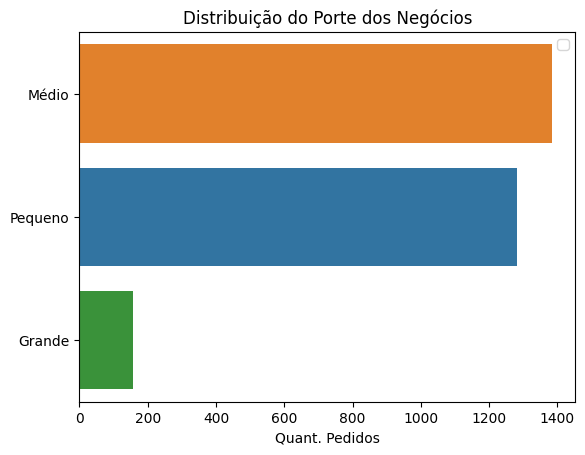

In [ ]:
# Gráfico df_vendas_f - porte do negócio
faixa_negocio = df_vendas_f['porte_negocio'].value_counts().index

sns.countplot(
    data=df_vendas_f, 
    y='porte_negocio', 
    hue='porte_negocio', 
    order=faixa_negocio
    )

plt.title('Distribuição do Porte dos Negócios')
plt.xlabel('Quant. Pedidos')
plt.ylabel('')

plt.legend()

plt.savefig('../img/grafico_distribuicao_porte.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\58711747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resumo_vendas_p, x='total_vendas', y='produto', palette='Blues_d')


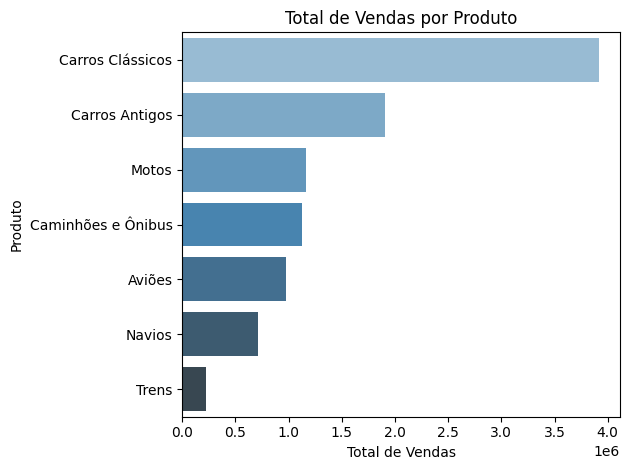

In [ ]:
# Gráfico df_resumo_vendas_p - Total de Vendas por Produto
sns.barplot(data=df_resumo_vendas_p, x='total_vendas', y='produto', palette='Blues_d')

plt.title('Total de Vendas por Produto')
plt.xlabel('Total de Vendas')
plt.ylabel('Produto')
plt.tight_layout()

plt.savefig('../img/grafico_total_vendas_prod.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

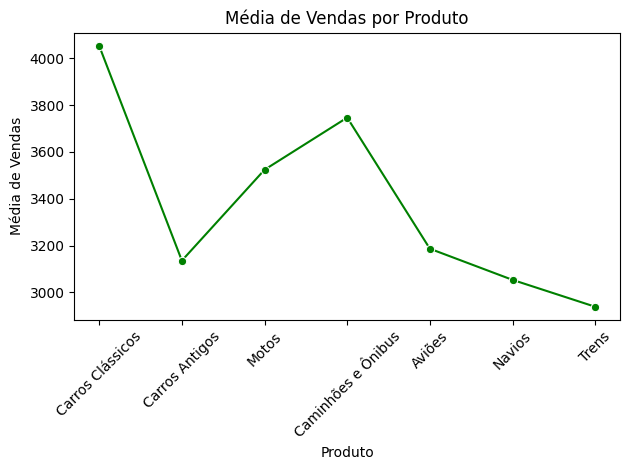

In [ ]:
# Gráfico df_resumo_vendas_p - Média de Vendas por Produto

sns.lineplot(data=df_resumo_vendas_p, x='produto', y='media_vendas', marker='o', color='green')

plt.title('Média de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../img/grafico_media_vendas.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

C:\Users\anasa\AppData\Local\Temp\ipykernel_20160\3430303870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resumo_vendas_p, x='quantidade_total', y='produto', palette='crest')


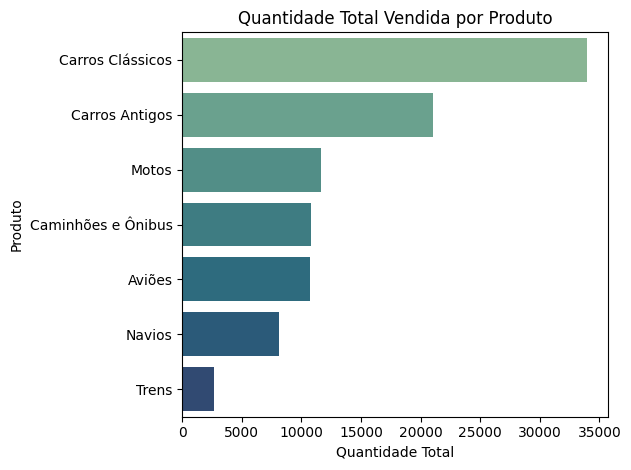

In [ ]:
# Gráfico df_resumo_vendas_p - Quantidade Total de Vendas por Produto

sns.barplot(data=df_resumo_vendas_p, x='quantidade_total', y='produto', palette='crest')

plt.title('Quantidade Total Vendida por Produto')
plt.xlabel('Quantidade Total')
plt.ylabel('Produto')
plt.tight_layout()

plt.savefig('../img/grafico_quant_ven_prod.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()

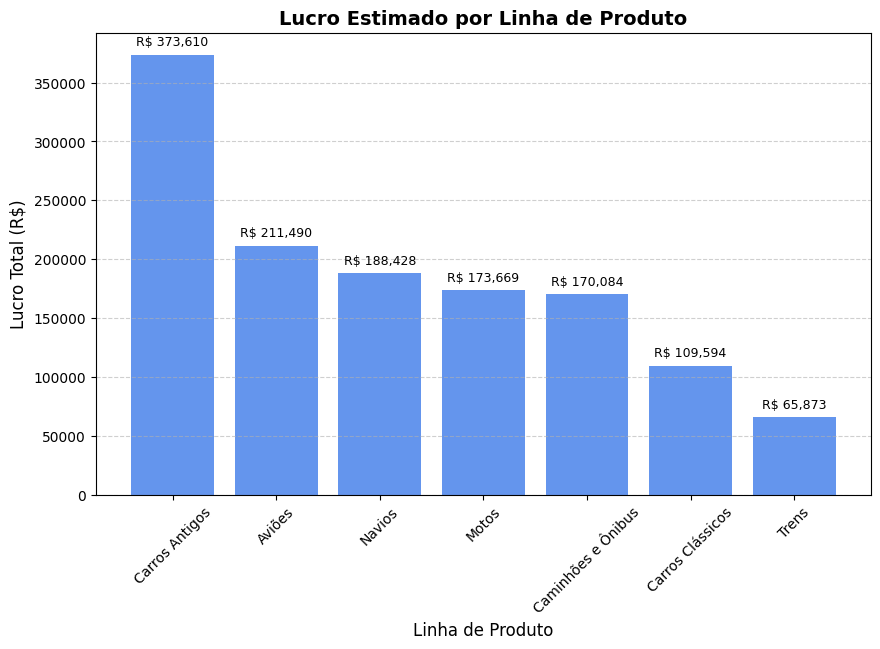

In [ ]:
# Gráfico de margem de lucro estimada por produto
# Garantindo ordenação decrescente só por segurança
lucro_por_linha = lucro_por_linha.sort_values(by='lucro_total', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(lucro_por_linha['linha_produto'], lucro_por_linha['lucro_total'], color='cornflowerblue')

plt.title('Lucro Estimado por Linha de Produto', fontsize=14, weight='bold')
plt.xlabel('Linha de Produto', fontsize=12)
plt.ylabel('Lucro Total (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Anotando os valores nas barras
for i, valor in enumerate(lucro_por_linha['lucro_total']):
    plt.text(i, valor + 5000, f'R$ {valor:,.0f}', ha='center', va='bottom', fontsize=9)

plt.savefig('../img/grafico_lucro_estimado.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()


In [ ]:

# Gráfico de relação entre mês e quantidade de compras - dispersão
df_agrupado = df_vendas.groupby('id_mes')['numero_pedido'].count().reset_index(name='qtd_pedidos')

plt.figure(figsize=(10, 6))
plt.scatter(df_agrupado['id_mes'], df_agrupado['qtd_pedidos'], alpha=0.6, color='mediumvioletred')

plt.title('Dispersão: Mês vs Quantidade de Compras', fontsize=14, weight='bold')
plt.xlabel('Mês (ID)', fontsize=12)
plt.ylabel('Quantidade de Pedidos', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.savefig('../img/grafico_dispercao.jpg', format='jpg', dpi=300)
plt.close()  # Fecha a figura para liberar memória

plt.show()